In [1]:
from data import read_user, read_values_and_situations
from pairwise_comparison import PairwiseComparison
import numpy as np
import matplotlib.pyplot as plt

In [2]:
values, values_name_only, situation_list = read_values_and_situations("data/values.csv", "data/situations.csv")
users = read_user("data/results.csv")
for user in users:
    user.set_choices_responses()
    user.set_sliders_responses()
print(len(users))

2


In [ ]:
#Ajouter calcul de consistance pour chaque user
#Lire l'article eigenvector

In [3]:
a = [1,2,3,4,5]
a = [i/10 for i in a]
print(a)


[0.1, 0.2, 0.3, 0.4, 0.5]


['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0.]
 [1. 1. 0. 0. 1. 0.]
 [1. 1. 0. 1. 1. 1.]]
############################
['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1.  0.3 0.9 0.  0.1 0. ]
 [0.7 1.  0.9 0.1 0.  0. ]
 [0.1 0.1 1.  0.2 0.9 1. ]
 [1.  0.9 0.8 1.  0.9 0.1]
 [0.9 1.  0.1 0.1 1.  0. ]
 [1.  1.  0.  0.9 1.  1. ]]
############################
[0.10056356 0.12111559 0.19114174 0.22466177 0.11577278 0.24674455]


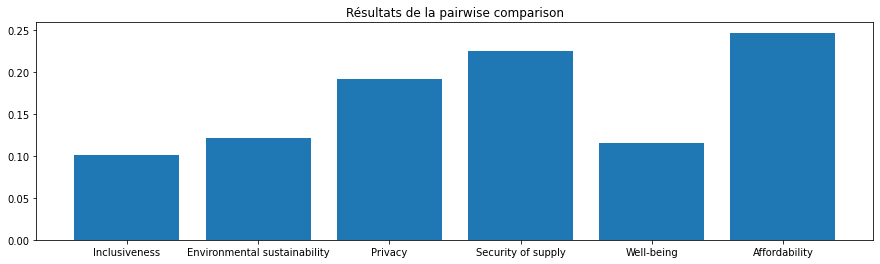

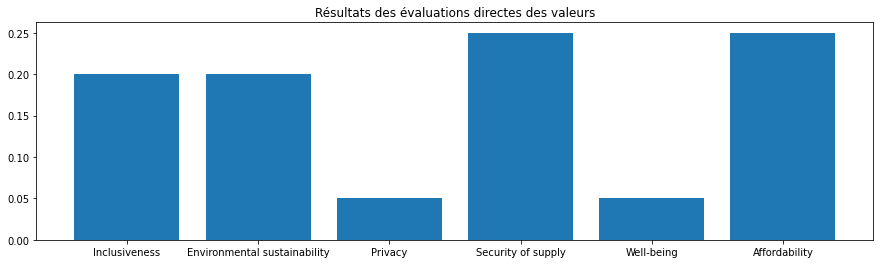

In [9]:
w1 = np.zeros(len(situation_list))
for i in range(len(situation_list)):
    w1[i] = (0.5-0.4*users[0].difficulties[i])
pcm1 = PairwiseComparison(values)
pcm1_r = pcm1.get_raw(situation_list,users[0].choices)
pcm1_p = pcm1.get_probability(situation_list, users[0].choices,w1)
print(values_name_only)
print(pcm1_r)
pcm1.matrix_to_additive_score(values_name_only , matrix = "raw")
print("############################")
print(values_name_only)
print(pcm1_p)
pcm1.matrix_to_additive_score(values_name_only , matrix = "probability")
print("############################")
eigenvalues_p1, eigenvectors_p1 = np.linalg.eig(pcm1_p)
principal_eigenvector_p1 = np.abs(eigenvectors_p1[:, 0])
eigen_scores_p1 = principal_eigenvector_p1 / np.sum(principal_eigenvector_p1)
print(eigen_scores_p1)
plt.figure(figsize = (15, 4))
plt.title("Résultats de la pairwise comparison")
plt.bar(values_name_only, eigen_scores_p1)
plt.show()
plt.figure(figsize = (15, 4))
plt.title("Résultats des évaluations directes des valeurs")
plt.bar(values_name_only, users[0].sliders_responses, color="red")
plt.show()

pairwise_vs_sliders1 = np.zeros(values)
for i in range(len(values)):
    pairwise_vs_sliders1[i] = eigen_scores_p1[i] - users[0].sliders_responses[i]
plt.figure(figsize = (15, 4))
plt.title("Différence entre pairwise comparison et évaluation directe")
plt.bar(values_name_only, pairwise_vs_sliders1, color="green")
plt.show()




['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 1. 1.]]
############################
['Inclusiveness', 'Environmental sustainability', 'Privacy', 'Security of supply', 'Well-being', 'Affordability']
[[1.  0.3 0.1 1.  0.9 1. ]
 [0.7 1.  0.9 0.9 1.  1. ]
 [0.9 0.1 1.  0.2 0.9 1. ]
 [0.  0.1 0.8 1.  0.9 0.1]
 [0.1 0.  0.1 0.1 1.  0. ]
 [0.  0.  0.  0.9 1.  1. ]]
############################
[0.21067985 0.32774131 0.20807725 0.13477515 0.03156316 0.08716328]


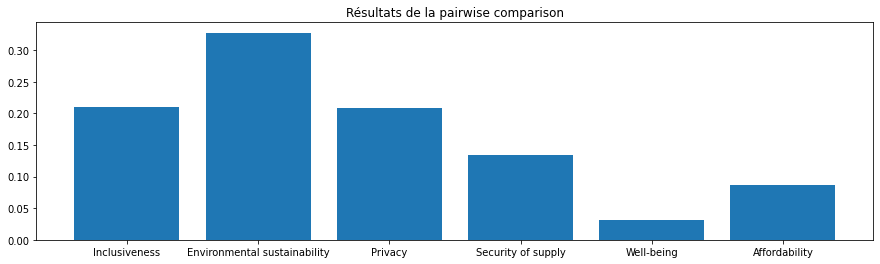

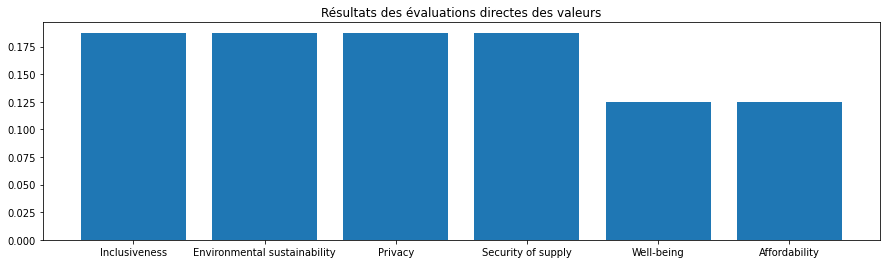

In [8]:
w2 = np.zeros(len(situation_list))
for i in range(len(situation_list)):
    w2[i] = (0.5-0.4*users[0].difficulties[i])
pcm2 = PairwiseComparison(values)
pcm2_r = pcm2.get_raw(situation_list,users[1].choices)
pcm2_p = pcm2.get_probability(situation_list, users[1].choices,w2)
print(values_name_only)
print(pcm2_r)
pcm1.matrix_to_additive_score(values_name_only , matrix = "raw")
print("############################")
print(values_name_only)
print(pcm2_p)
pcm1.matrix_to_additive_score(values_name_only , matrix = "probability")
print("############################")
eigenvalues_p2, eigenvectors_p2 = np.linalg.eig(pcm2_p)
principal_eigenvector_p2 = np.abs(eigenvectors_p2[:, 0])
eigen_scores_p2 = principal_eigenvector_p2 / np.sum(principal_eigenvector_p2)
print(eigen_scores_p2)
plt.figure(figsize = (15, 4))
plt.title("Résultats de la pairwise comparison")
plt.bar(values_name_only, eigen_scores_p2)
plt.show()
plt.figure(figsize = (15, 4))
plt.title("Résultats des évaluations directes des valeurs")
plt.bar(values_name_only, users[1].sliders_responses, color="red")
plt.show()

pairwise_vs_sliders2 = np.zeros(values)
for i in range(len(values)):
    pairwise_vs_sliders2[i] = eigen_scores_p2[i] - users[1].sliders_responses[i]
plt.figure(figsize = (15, 4))
plt.title("Différence entre pairwise comparison et évaluation directe")
plt.bar(values_name_only, pairwise_vs_sliders2, color="green")
plt.show()